# 5 Reshaping and Transformation

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

## Reshaping DataFrame

### Pivoting

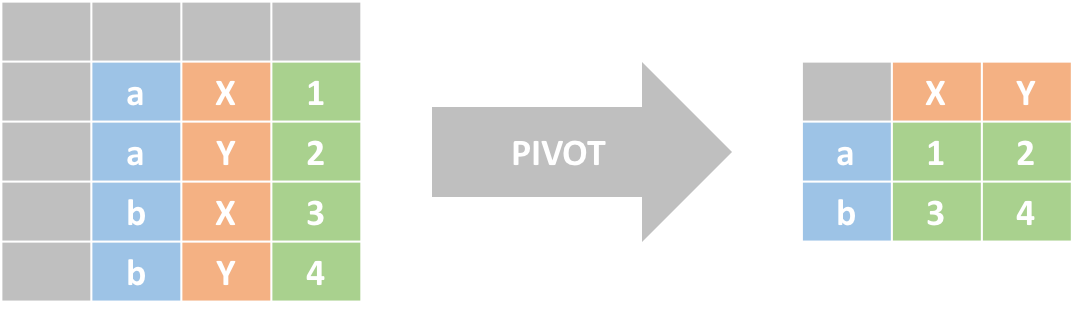

In [2]:
Image("images/reshape-pivot.png", width=358)

In [2]:
df = pd.read_csv('file6.csv')

In [4]:
print(df)
df_pivoted = df.pivot(index='date', columns='city', values='min_temp_C')
print(df_pivoted)

         date      city  min_temp_C  max_temp_C
0  2017-01-01    London           4          10
1  2017-01-01  New York           5           8
2  2017-01-01  Shanghai           5          15
3  2017-01-02    London          -1           5
4  2017-01-02  New York           3           4
5  2017-01-02  Shanghai           8          15
6  2017-01-03    London          -2           5
7  2017-01-03  New York           4           6
8  2017-01-03  Shanghai           7          14
city        London  New York  Shanghai
date                                  
2017-01-01       4         5         5
2017-01-02      -1         3         8
2017-01-03      -2         4         7


In [5]:
# If values are not specified, all remaining columns will be used 
# and the result will have hierarchically indexed columns
print(df)
df_pivoted = df.pivot(index='date', columns='city')
print(df_pivoted)

         date      city  min_temp_C  max_temp_C
0  2017-01-01    London           4          10
1  2017-01-01  New York           5           8
2  2017-01-01  Shanghai           5          15
3  2017-01-02    London          -1           5
4  2017-01-02  New York           3           4
5  2017-01-02  Shanghai           8          15
6  2017-01-03    London          -2           5
7  2017-01-03  New York           4           6
8  2017-01-03  Shanghai           7          14
           min_temp_C                   max_temp_C                  
city           London New York Shanghai     London New York Shanghai
date                                                                
2017-01-01          4        5        5         10        8       15
2017-01-02         -1        3        8          5        4       15
2017-01-03         -2        4        7          5        6       14


### Stacking and Unstacking

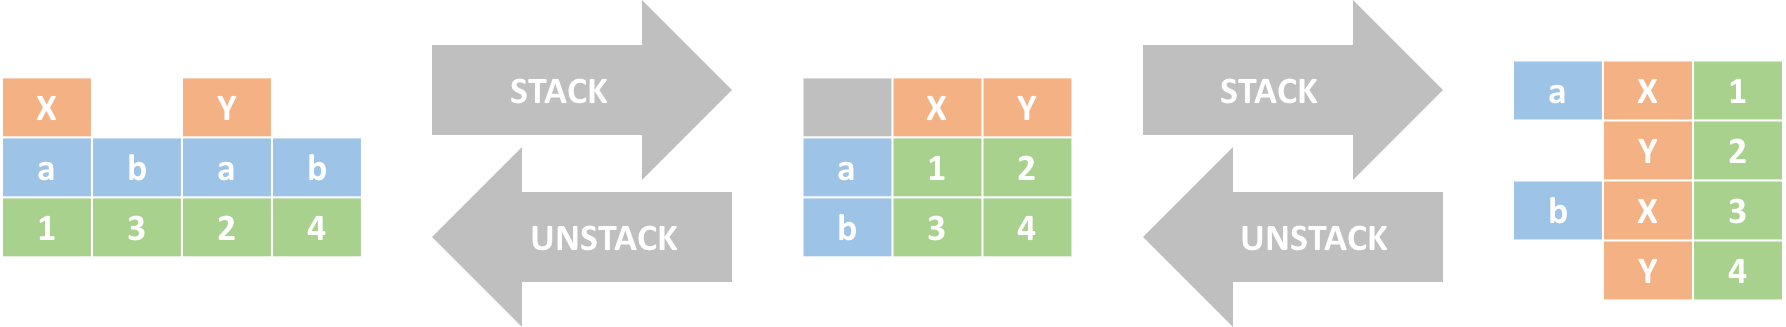

In [3]:
Image("images/reshape-stack-unstack.png", width=595.33)

In [11]:
df = pd.DataFrame([[1, 2],
                   [3, 4]],
                  index=['a', 'b'],
                  columns=['X', 'Y'])
print(df)
print(df.stack())


   X  Y
a  1  2
b  3  4
a  X    1
   Y    2
b  X    3
   Y    4
dtype: int64


In [6]:
df = df.set_index(['date', 'city'])

In [7]:
# Unstack pivots a level of the row index to the column axis
print(df)
df_unstacked = df.unstack()
print(df_unstacked)

                     min_temp_C  max_temp_C
date       city                            
2017-01-01 London             4          10
           New York           5           8
           Shanghai           5          15
2017-01-02 London            -1           5
           New York           3           4
           Shanghai           8          15
2017-01-03 London            -2           5
           New York           4           6
           Shanghai           7          14
           min_temp_C                   max_temp_C                  
city           London New York Shanghai     London New York Shanghai
date                                                                
2017-01-01          4        5        5         10        8       15
2017-01-02         -1        3        8          5        4       15
2017-01-03         -2        4        7          5        6       14


In [8]:
# Stack pivots a level of the column labels to the row axis
df = df_unstacked
print(df)
df_stacked = df.stack()
print(df_stacked)

           min_temp_C                   max_temp_C                  
city           London New York Shanghai     London New York Shanghai
date                                                                
2017-01-01          4        5        5         10        8       15
2017-01-02         -1        3        8          5        4       15
2017-01-03         -2        4        7          5        6       14
                     min_temp_C  max_temp_C
date       city                            
2017-01-01 London             4          10
           New York           5           8
           Shanghai           5          15
2017-01-02 London            -1           5
           New York           3           4
           Shanghai           8          15
2017-01-03 London            -2           5
           New York           4           6
           Shanghai           7          14


## Data Transformation

### Removing Duplicates

In [11]:
# Across all columns
df = pd.DataFrame({
        'col_0': [0, 0, 1, 1],
        'col_1': [0, 0, 2, 3]
    })
print(df)
df_deduplicated = df.drop_duplicates() # default keep='first'
print(df_deduplicated)
# keep
# first: Drop duplicates except for the first occurrence.
# last: Drop duplicates except for the last occurrence.
# False: Drop all duplicates.

   col_0  col_1
0      0      0
1      0      0
2      1      2
3      1      3
   col_0  col_1
0      0      0
2      1      2
3      1      3


In [12]:
# Specifying columns
df = pd.DataFrame({
        'col_0': [0, 0, 1, 1],
        'col_1': [0, 0, 2, 3]
    })
print(df)
df_deduplicated = df.drop_duplicates(['col_0']) # default keep='first'
print(df_deduplicated)
# keep
# first: Drop duplicates except for the first occurrence.
# last: Drop duplicates except for the last occurrence.
# False: Drop all duplicates.

   col_0  col_1
0      0      0
1      0      0
2      1      2
3      1      3
   col_0  col_1
0      0      0
2      1      2


### Replacing values

In [13]:
df = pd.read_csv('file6.csv')

In [17]:
print(df)
city_to_country = {'London': 'UK',
                  'New York': 'US',
                  'Shanghai': 'CN'}
df_replaced = df.replace(city_to_country)
print(df_replaced)

         date      city  min_temp_C  max_temp_C
0  2017-01-01    London           4          10
1  2017-01-01  New York           5           8
2  2017-01-01  Shanghai           5          15
3  2017-01-02    London          -1           5
4  2017-01-02  New York           3           4
5  2017-01-02  Shanghai           8          15
6  2017-01-03    London          -2           5
7  2017-01-03  New York           4           6
8  2017-01-03  Shanghai           7          14
         date city  min_temp_C  max_temp_C
0  2017-01-01   UK           4          10
1  2017-01-01   US           5           8
2  2017-01-01   CN           5          15
3  2017-01-02   UK          -1           5
4  2017-01-02   US           3           4
5  2017-01-02   CN           8          15
6  2017-01-03   UK          -2           5
7  2017-01-03   US           4           6
8  2017-01-03   CN           7          14


### Renaming Index

In [18]:
# Renaming column names
print(df_replaced)
df_col_renamed = df_replaced.rename(columns={'city': 'country'})
print(df_col_renamed)

         date city  min_temp_C  max_temp_C
0  2017-01-01   UK           4          10
1  2017-01-01   US           5           8
2  2017-01-01   CN           5          15
3  2017-01-02   UK          -1           5
4  2017-01-02   US           3           4
5  2017-01-02   CN           8          15
6  2017-01-03   UK          -2           5
7  2017-01-03   US           4           6
8  2017-01-03   CN           7          14
         date country  min_temp_C  max_temp_C
0  2017-01-01      UK           4          10
1  2017-01-01      US           5           8
2  2017-01-01      CN           5          15
3  2017-01-02      UK          -1           5
4  2017-01-02      US           3           4
5  2017-01-02      CN           8          15
6  2017-01-03      UK          -2           5
7  2017-01-03      US           4           6
8  2017-01-03      CN           7          14


In [19]:
# Renaming row indexes
df_col_renamed = df_col_renamed.set_index('country')
print(df_col_renamed)
df_row_renamed = df_col_renamed.rename(index={'UK': 'United Kindom',
                                              'US': 'United States',
                                              'CN': 'China'})
print(df_row_renamed)

               date  min_temp_C  max_temp_C
country                                    
UK       2017-01-01           4          10
US       2017-01-01           5           8
CN       2017-01-01           5          15
UK       2017-01-02          -1           5
US       2017-01-02           3           4
CN       2017-01-02           8          15
UK       2017-01-03          -2           5
US       2017-01-03           4           6
CN       2017-01-03           7          14
                     date  min_temp_C  max_temp_C
country                                          
United Kindom  2017-01-01           4          10
United States  2017-01-01           5           8
China          2017-01-01           5          15
United Kindom  2017-01-02          -1           5
United States  2017-01-02           3           4
China          2017-01-02           8          15
United Kindom  2017-01-03          -2           5
United States  2017-01-03           4           6
China          2

### Binning

In [25]:
# Specifying bin boundaries
x = np.array([90, 80, 98, 85, 74, 62, 73, 56, 84, 74, 88, 85])
binned = pd.cut(x, bins=[0, 60, 70, 80, 90, 100])
print(pd.value_counts(binned).sort_index(ascending=False))

(90, 100]    1
(80, 90]     5
(70, 80]     4
(60, 70]     1
(0, 60]      1
dtype: int64


In [26]:
# Specifying number of equal-length bins
x = np.array([90, 80, 98, 85, 74, 62, 73, 56, 84, 74, 88, 85])
binned = pd.cut(x, bins=4)
print(pd.value_counts(binned).sort_index(ascending=False))

(87.5, 98.0]      3
(77.0, 87.5]      4
(66.5, 77.0]      3
(55.958, 66.5]    2
dtype: int64


In [28]:
# Specifying number of quantiles, same number of items in each bin
x = np.array([90, 80, 98, 85, 74, 62, 73, 56, 84, 74, 88, 85])
binned = pd.qcut(x, q=[0, 0.25, 0.5, 0.75, 1])
print(pd.value_counts(binned).sort_index(ascending=False))

(85.75, 98.0]      3
(82.0, 85.75]      3
(73.75, 82.0]      3
(55.999, 73.75]    3
dtype: int64


In [29]:
# Adding labels for the resulting bins
x = np.array([90, 80, 98, 85, 74, 62, 73, 56, 84, 74, 88, 85])
binned = pd.cut(x, bins=[0, 60, 70, 80, 90, 100], 
                labels=['F', 'D', 'C', 'B', 'A'])
print(pd.value_counts(binned).sort_index(ascending=False))

A    1
B    5
C    4
D    1
F    1
dtype: int64


### Dummy Variables

In [32]:
df = pd.DataFrame({
    'gender': ['F', 'M', 'M', 'F']
})
print(df)
print(pd.get_dummies(df['gender']))

  gender
0      F
1      M
2      M
3      F
   F  M
0  1  0
1  0  1
2  0  1
3  1  0


In [33]:
# Drop a column to avoid collinearity
df = pd.DataFrame({
    'gender': ['F', 'M', 'M', 'F']
})
print(df)
print(pd.get_dummies(df['gender'], drop_first=True))

  gender
0      F
1      M
2      M
3      F
   M
0  0
1  1
2  1
3  0


In [34]:
# Add prefix
df = pd.DataFrame({
    'gender': ['F', 'M', 'M', 'F']
})
print(df)
print(pd.get_dummies(df['gender'], prefix='gender'))

  gender
0      F
1      M
2      M
3      F
   gender_F  gender_M
0         1         0
1         0         1
2         0         1
3         1         0
